**МЛ практика 5. Задача регрессии**

**Объяснить результаты метрик качества MAE, MSE, R2:**
1. У меня данных много и с большим разбросом. Возможно из-за этого результаты **MAE** и **MSE** большие.

Сами по себе суммы ошибок могут быть большими как я понял.

2. Процент стабильно меньше десяти.

Самое вероятное - мой косяк, но возможно данные очень разные или модель плохая.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('content/income.csv')

y = df['capital-gain'] # выбираем целевую переменную (количественная)
X = df.drop('capital-gain', axis=1) # переменные для проверки влияния
df['income >50K'] = df['income >50K'].astype('category')
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital-status'] = df['marital-status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native-country'] = df['native-country'].astype('category')

In [2]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,20,United-States,0


In [3]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [4]:
X

,age,education-num,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,38,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,9,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,9,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,9,0,20,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,age,education-num,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,y
0,39,13,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,2174
1,50,13,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,0
2,38,9,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
3,53,7,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
4,28,13,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,38,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
32557,40,9,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
32558,58,9,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0
32559,22,9,0,20,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,0


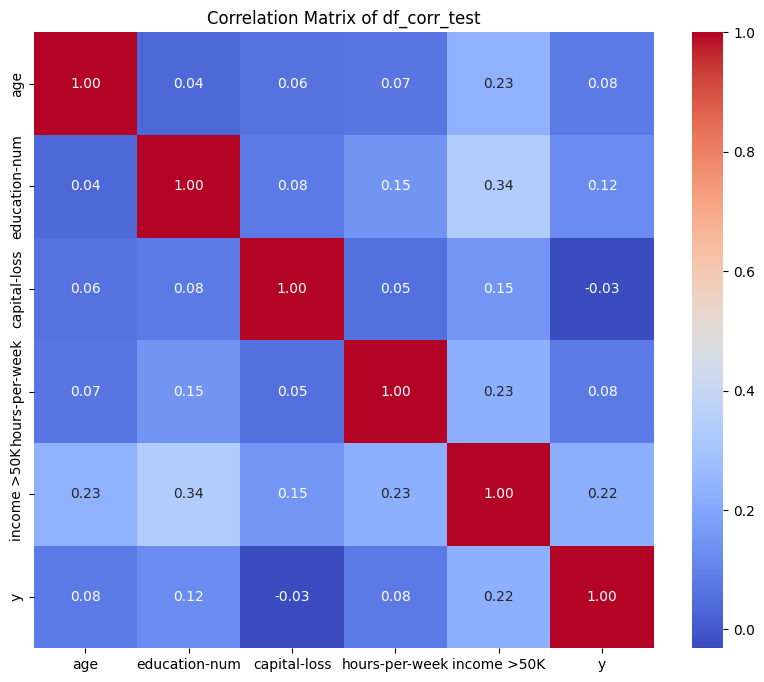

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [8]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать

Regularization: None
Mean Absolute Error (MAE): 2002.05
Mean Squared Error (MSE): 59033227.56
R^2 Score: 0.07


In [9]:
resolve_regression(X[['age', 'education-num', 'capital-loss']], y)
None

Regularization: None
Mean Absolute Error (MAE): 2124.99
Mean Squared Error (MSE): 62273971.09
R^2 Score: 0.02


In [10]:
X

,age,education-num,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,38,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,9,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,9,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,9,0,20,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        32561 non-null  int64
 1   education-num                              32561 non-null  int64
 2   capital-loss                               32561 non-null  int64
 3   hours-per-week                             32561 non-null  int64
 4   income >50K                                32561 non-null  int64
 5   workclass_Local-gov                        32561 non-null  bool 
 6   workclass_Never-worked                     32561 non-null  bool 
 7   workclass_Private                          32561 non-null  bool 
 8   workclass_Self-emp-inc                     32561 non-null  bool 
 9   workclass_Self-emp-not-inc                 32561 non-null  bool 
 10  workclass_State-gov                        325

In [12]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [14]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [15]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 1886.66
Mean Squared Error (MSE): 59404899.24
R^2 Score: 0.07


In [16]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 1784.53
Mean Squared Error (MSE): 59415915.61
R^2 Score: 0.07


Regularization: None
Mean Absolute Error (MAE): 1784.53
Mean Squared Error (MSE): 59415915.61
R^2 Score: 0.07


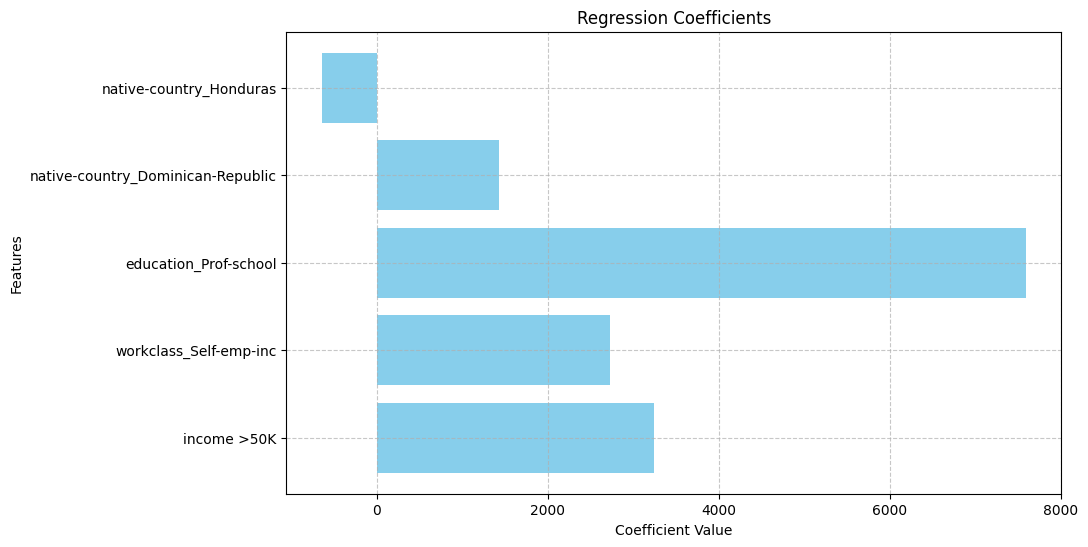

In [17]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

**Анализ графика коэфициекнтов линейной регрессии:**
education_Prof-school - имеет самый влиятельный вклад в модель.
**Метрики:**<br>
**Regularization:** None<br>
**Mean Absolute Error** (MAE): 1784.53 - значения у меня в датафрейме не маленьки, так что наверное всё не так и плохо. Показывает насколько в среднем прогнозы модели отклоняются от реальных значений.<br>
**Mean Squared Error** (MSE): 59415915.61 - то же но в квадрате. Наказывает большие ошибки сильнее маленьких. Показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате<br>
**R^2 Score**: 0.07 - точность объяснения дисперсии, т.е. меры разброса значений целевой переменной, маленькая (7%). Плохой прогноз - плохая модель

In [18]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['int64', 'float64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)
#'education-num', 'age'
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
# Создаем копию DataFrame, если необходимо
X_selected_rfe = X_selected_rfe.copy()

# Применяем нормализацию
X_selected_rfe.loc[:, numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])

In [19]:
X_selected_rfe

,income >50K,workclass_Self-emp-inc,education_Prof-school,native-country_Dominican-Republic,native-country_Honduras
0,0,False,False,False,False
1,0,False,False,False,False
2,0,False,False,False,False
3,0,False,False,False,False
4,0,False,False,False,False
...,...,...,...,...,...
32556,0,False,False,False,False
32557,1,False,False,False,False
32558,0,False,False,False,False
32559,0,False,False,False,False


Regularization: None
Mean Absolute Error (MAE): 1784.53
Mean Squared Error (MSE): 59415915.61
R^2 Score: 0.07


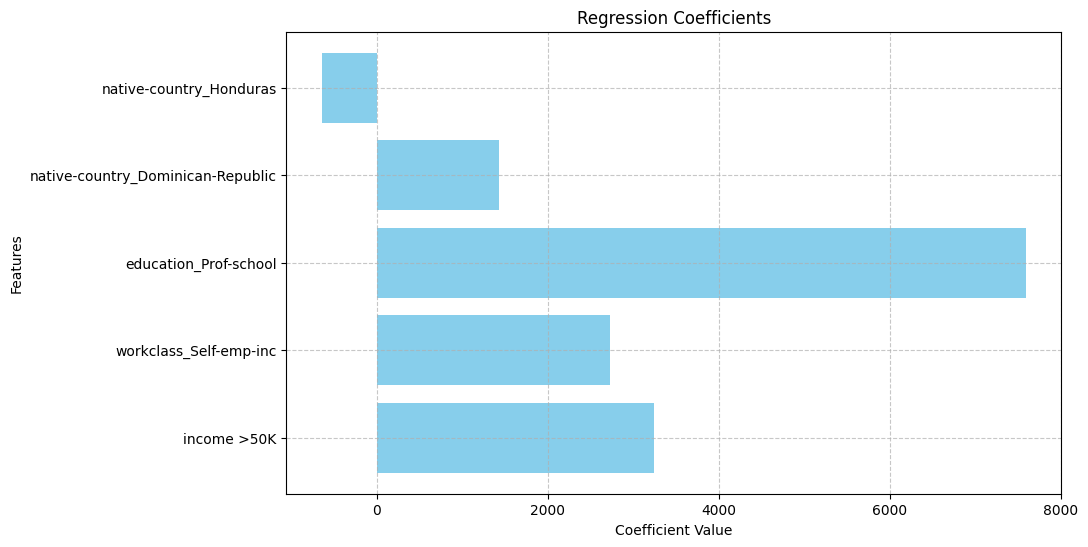

In [20]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

In [21]:

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 1784.53
Mean Squared Error (MSE): 59415915.61
R^2 Score: 0.07


In [22]:
X

,age,education-num,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,0,40,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,38,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32557,40,9,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32558,58,9,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
32559,22,9,0,20,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


Regularization: l1
Mean Absolute Error (MAE): 1979.60
Mean Squared Error (MSE): 58997862.86
R^2 Score: 0.07


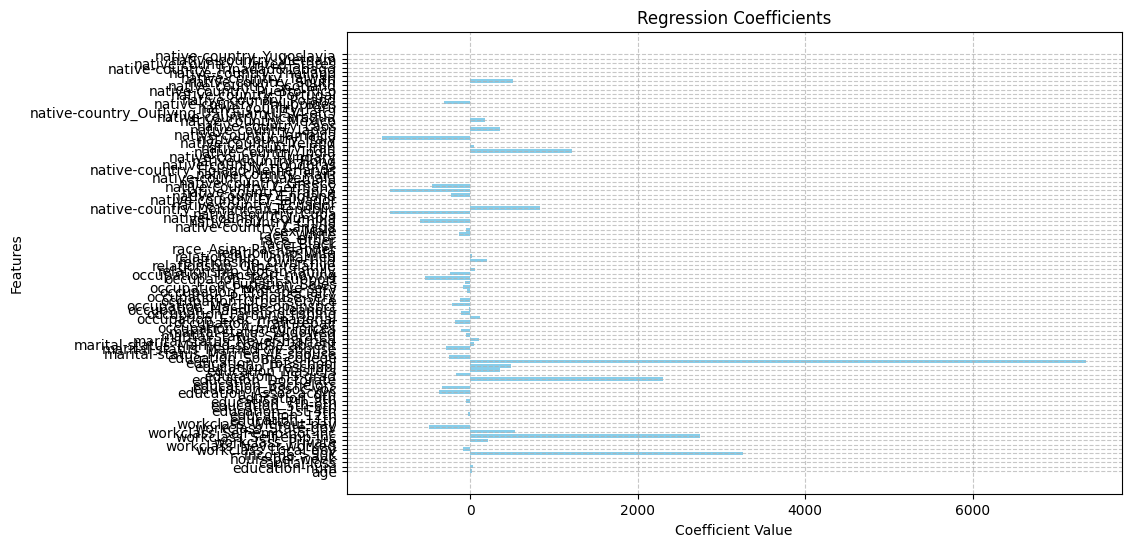

In [23]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: l2
Mean Absolute Error (MAE): 2000.56
Mean Squared Error (MSE): 59031309.46
R^2 Score: 0.07


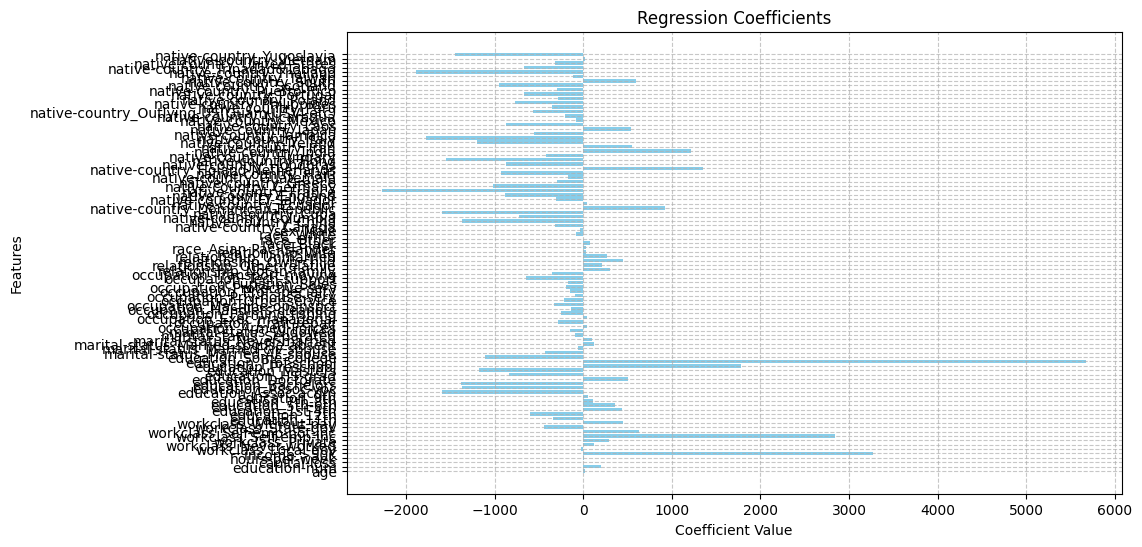

In [24]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 2002.05
Mean Squared Error (MSE): 59033227.56
R^2 Score: 0.07


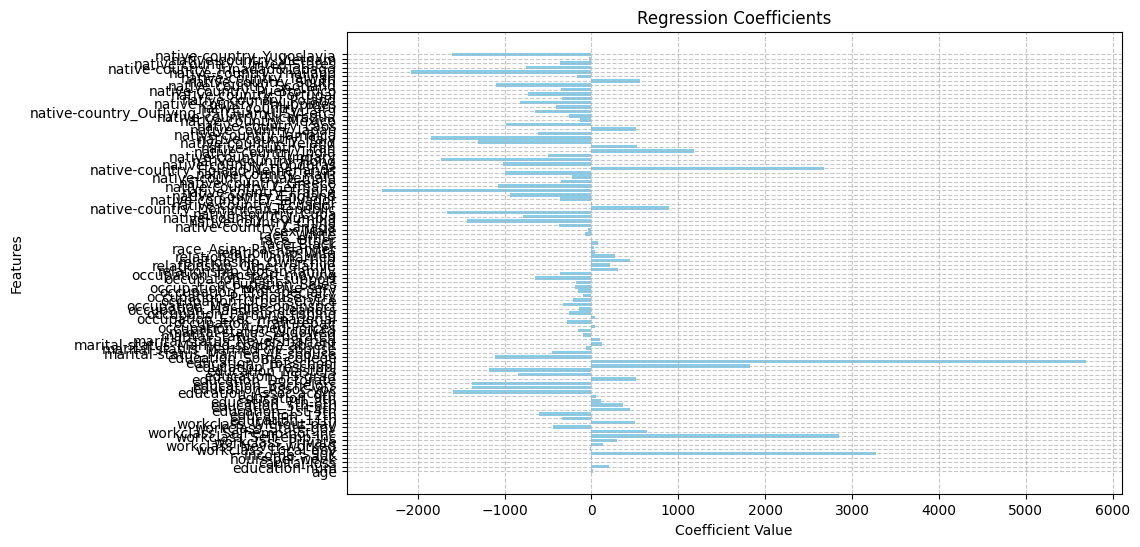

In [25]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

In [26]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1891.6322124980807
Mean Squared Error (MSE): 66072100.42970674
R^2 Score: -0.03949871271207828


In [28]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42, max_depth=5)  # Ограничиваем максимальную глубину дерева
model.fit(X_train, y_train)

# Предсказания на тестовых данных
y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1753.6975126769712
Mean Squared Error (MSE): 60776878.663819805
R^2 Score: 0.04380991791062272


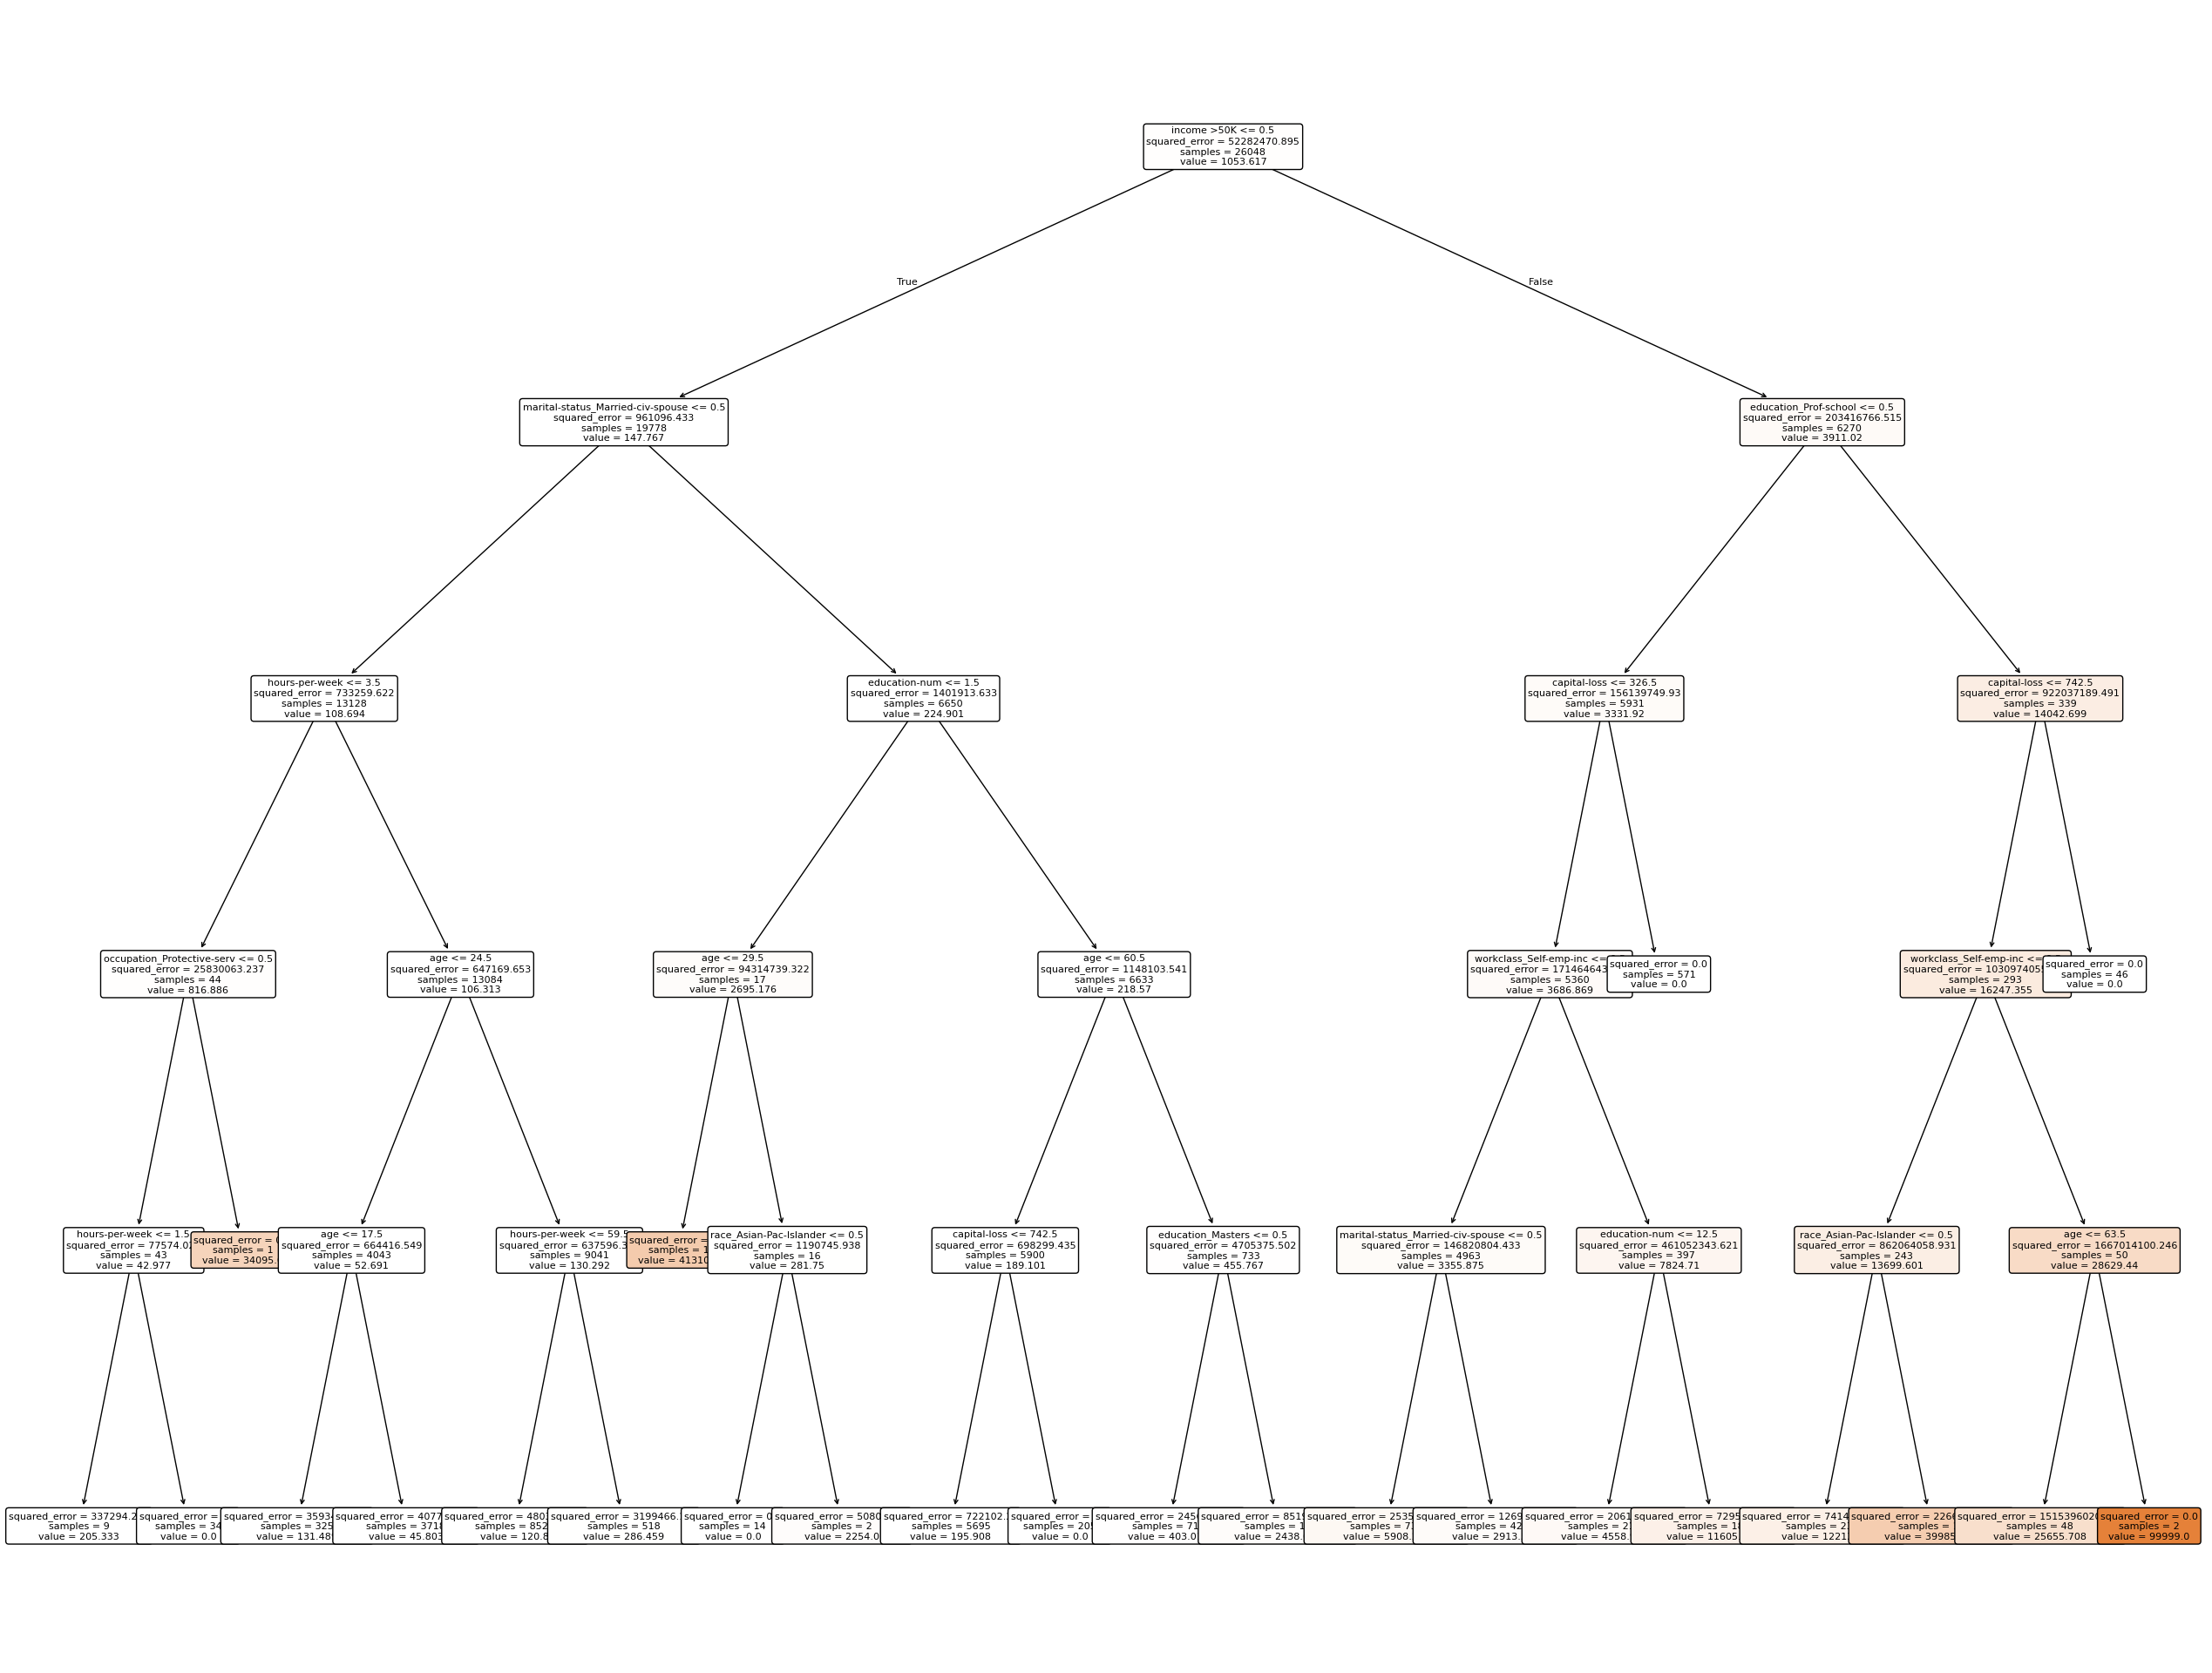

In [29]:
# Дерево решений
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=X.columns, rounded=True, fontsize=8)
plt.subplots_adjust(left=0.1, right=2.6, top=2, bottom=0.1)
plt.show()